<a href="https://colab.research.google.com/github/msareebhakak/Polynomial-Regression/blob/master/RunProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Function that creates the X matrix as defined for fitting our model
def create_X(x,deg):
    X = np.ones((len(x),deg+1))
    for i in range(1,deg+1):
        X[:,i] = x**i
    return X

# Function for predicting the response
def predict_y(x,beta):
    return np.dot(create_X(x,len(beta)-1),beta)

# Function for fitting the model
def fit_beta(df,deg):
    return np.linalg.lstsq(create_X(df.x,deg),df.y,rcond=None)[0]

# Function for computing the MSE
def mse(y,yPred):
    return np.mean((y-yPred)**2)

# Loading training, validation and test data
dfTrain = pandas.read_csv('Data_Train.csv')
dfVal = pandas.read_csv('Data_Val.csv')
dfTest = pandas.read_csv('Data_Test.csv')

############ TRAINING A MODEL

# Fitting model
deg = 1
X = create_X(dfTrain.x,deg)
beta = fit_beta(dfTrain,deg)

# Computing training error
yPredTrain = predict_y(dfTrain.x,beta)
err = mse(dfTrain.y,yPredTrain)
print('Training Error = {:2.3}'.format(err))

# Computing validation error
yPredVal = predict_y(dfVal.x,beta)
err = mse(dfVal.y,yPredVal)
print('Validation Error = {:2.3}'.format(err))

# Computing test error
yPredTest = predict_y(dfTest.x,beta)
err = mse(dfTest.y,yPredTest)
print('Test Error = {:2.3}'.format(err))

Training Error = 0.0258
Validation Error = 0.0249
Test Error = 0.0154


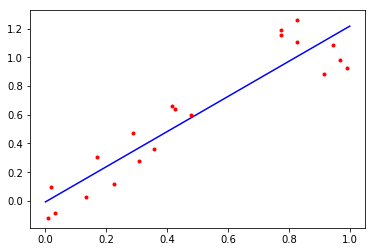

In [27]:
############ PLOTTING FITTED MODEL
x = np.linspace(0,1,100)
y = predict_y(x,beta)

plt.plot(x,y,'b-',dfTrain.x,dfTrain.y,'r.')
plt.show()

Training Error = 0.0258
Validation Error = 0.0249
Test Error = 0.0154
Training Error = 0.0188
Validation Error = 0.0186
Test Error = 0.011
Training Error = 0.00967
Validation Error = 0.00843
Test Error = 0.0116
Training Error = 0.00929
Validation Error = 0.00934
Test Error = 0.0113
Training Error = 0.00902
Validation Error = 0.0109
Test Error = 0.013
Training Error = 0.00874
Validation Error = 0.0108
Test Error = 0.0122
Training Error = 0.00873
Validation Error = 0.0109
Test Error = 0.0118
Training Error = 0.00873
Validation Error = 0.0111
Test Error = 0.0119
Training Error = 0.00823
Validation Error = 0.0152
Test Error = 0.0116
Training Error = 0.00673
Validation Error = 0.0392
Test Error = 0.0286


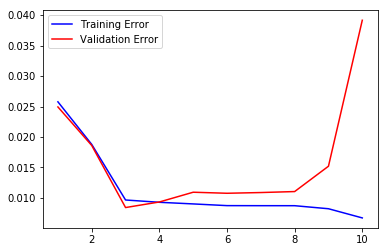

The minimum validation error is 0.00842720534001476
The index at min error is 3


In [30]:
############ HYPER-PARAMETER TUNING

# Initializing range of degree values to be tested and errors
degRange = list(range(1,11))
errTrain = np.zeros(len(degRange))
errVal = np.zeros(len(degRange))

# Computing error as a function of degree
for i in degRange:
  deg = i
  X = create_X(dfTrain.x,deg)
  beta = fit_beta(dfTrain,deg)

  # Computing training error
  yPredTrain = predict_y(dfTrain.x,beta)
  err = mse(dfTrain.y,yPredTrain)
  errTrain[i-1]=err
  print('Training Error = {:2.3}'.format(err))

  # Computing validation error
  yPredVal = predict_y(dfVal.x,beta)
  err = mse(dfVal.y,yPredVal)
  errVal[i-1]=err
  print('Validation Error = {:2.3}'.format(err))

  # Computing test error
  yPredTest = predict_y(dfTest.x,beta)
  err = mse(dfTest.y,yPredTest)
  print('Test Error = {:2.3}'.format(err))
    
# Plotting training and validation errors
plt.plot(degRange,errTrain,'b-',degRange,errVal,'r-')
plt.legend(('Training Error','Validation Error'))
plt.show()
err_min = min(errVal)
err_min_index=np.argmin(errVal)
print("The minimum validation error is", err_min)
print("The index at min error is", err_min_index+1)

In [36]:
############ TRAINING SELECTED MODEL

# Concatenating data training and validation data frames
li = [dfTrain, dfVal]

df = pandas.concat(li, axis=0, ignore_index=True)


# Fit model using the optimal degree found in the previous cell
degOpt = err_min_index+1

deg = degOpt
X = create_X(df.x,deg)
beta = fit_beta(df,deg)

# Computing training error
yPredTrain = predict_y(df.x,beta)
err = mse(df.y,yPredTrain)
print('Training Error = {:2.3}'.format(err))

# Computing test error
yPredTest = predict_y(dfTest.x,beta)
err = mse(dfTest.y,yPredTest)
print('Test Error = {:2.3}'.format(err))
# Compute and print training and test errors


Training Error = 0.0087
Test Error = 0.0108


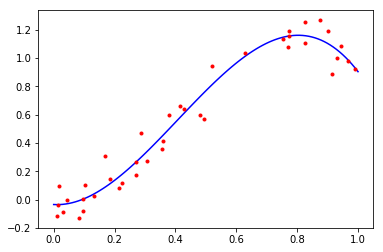

In [37]:
############ PLOTTING FITTED MODEL
# Plot the fitted model as in the second cell
# ...
x = np.linspace(0,1,100)
y = predict_y(x,beta)

plt.plot(x,y,'b-',df.x,df.y,'r.')
plt.show()